In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
titanic_data = pd.read_csv("./datasets/titanic/train.csv")
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(titanic_data, test_size=0.2, random_state=24)
#Copiamos el conjunto de entrenamiento para evitar modificar el original
df = train_set.copy()
df_test = test_set.copy()
print("Tamaño del conjunto de entrenamiento:", len(train_set))
print("Tamaño del conjunto de prueba:", len(test_set))

Tamaño del conjunto de entrenamiento: 712
Tamaño del conjunto de prueba: 179


In [6]:
# 1. Definir X e y a partir del conjunto estratificado
X_train = df.drop("Survived", axis=1)
y_train = df["Survived"]

X_test = df_test.drop("Survived", axis=1)
y_test = df_test["Survived"]

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Crear el modelo
model = RandomForestClassifier(random_state=42)

X_train_basic = X_train.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Sex", "Embarked"], errors="ignore")
#X_train_basic = X_train.select_dtypes(include=["int64", "float64"])

# Validación cruzada con 5 particiones
scores = cross_val_score(model, X_train_basic, y_train, cv=5, scoring="accuracy")
#cross_val_score(...) evalúa, pero no guarda el modelo entrenado, así que si luego haces

# Mostrar resultados
print("Precisión por partición:", scores)
print("Precisión media: {:.4f}".format(scores.mean()))
print("Desviación estándar: {:.4f}".format(scores.std()))

Precisión por partición: [0.72727273 0.71328671 0.65492958 0.67605634 0.66901408]
Precisión media: 0.6881
Desviación estándar: 0.0275


In [18]:
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train_basic, y_train)

X_test_basic = X_test_basic.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Sex", "Embarked"], errors="ignore")

y_pred = model.predict(X_test_basic)
acc = accuracy_score(y_test, y_pred)

print("Accuracy en test con RandomForest: {:.4f}".format(acc))

Accuracy en test con RandomForest: 0.7039


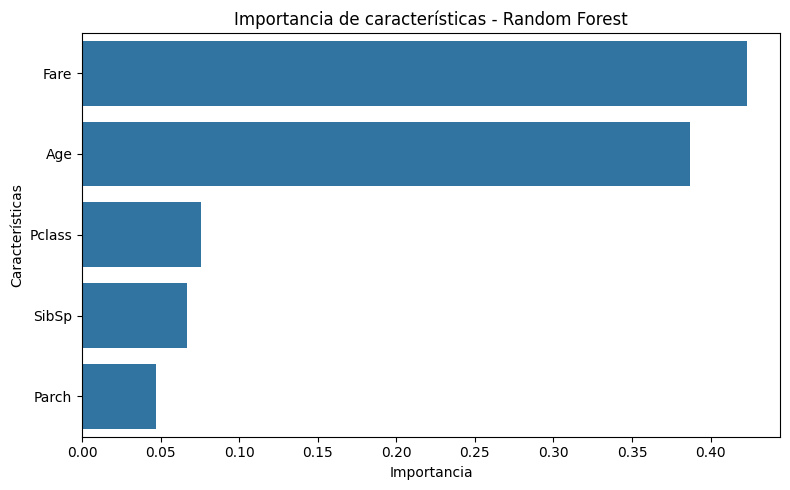

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener importancia
rf_importances = model.feature_importances_

# Asociar a nombres
rf_features = pd.Series(rf_importances, index=X_train_basic.columns).sort_values(ascending=False)

# Visualizar
plt.figure(figsize=(8, 5))
sns.barplot(x=rf_features, y=rf_features.index)
plt.title("Importancia de características - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.show()
